<a href="https://colab.research.google.com/github/Justanewguy21/YOLOV8DetectingCarinImage/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# step1

In [ ]:
!gdown 1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31
!unzip cars_yolo_data.zip


Downloading...
From (original): https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31
From (redirected): https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31&confirm=t&uuid=af4df82a-296e-4437-9eca-a1578d0c0b34
To: /content/cars_yolo_data.zip
100% 37.7M/37.7M [00:01<00:00, 36.4MB/s]
Archive:  cars_yolo_data.zip
   creating: yolo_data/
   creating: yolo_data/val/
   creating: yolo_data/val/images/
  inflating: yolo_data/val/images/vid_4_28440.jpg  
  inflating: yolo_data/val/images/vid_4_13700.jpg  
  inflating: yolo_data/val/images/vid_4_1900.jpg  
  inflating: yolo_data/val/images/vid_4_9640.jpg  
  inflating: yolo_data/val/images/vid_4_13880.jpg  
  inflating: yolo_data/val/images/vid_4_1980.jpg  
  inflating: yolo_data/val/images/vid_4_9220.jpg  
  inflating: yolo_data/val/images/vid_4_26380.jpg  
  inflating: yolo_data/val/images/vid_4_12140.jpg  
  inflating: yolo_data/val/images/vid_4_26460.jpg  
  inflating: yolo_data/val/images/vid_4_9200.jpg  
  inflating

# step 2

In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


# Step 3

In [ ]:
import os
import cv2
import json
import matplotlib.pyplot as plt



In [ ]:
from ultralytics import YOLO
#load a model
yolo_yaml_path = 'yolo_data/data.yml'
model = YOLO('yolov8s.yaml').load('yolov8s.pt')


100%|██████████| 21.5M/21.5M [00:00<00:00, 257MB/s]

Transferred 355/355 items from pretrained weights


In [ ]:
# Set up some important parameters
epochs = 15
imgsz = 640
batch_size = 8
patience =5
lr = 0.0005

In [ ]:
#start training
results = model.train(
    data = yolo_yaml_path,
    epochs = epochs,
    imgsz = imgsz,
    batch = batch_size,
    lr0 = lr,
    patience = patience,
    project = 'models',
    name = 'yolov8/detect/train'

)

Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=yolo_data/data.yml, epochs=15, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=models, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 21.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 93.6MB/s]


AMP: checks passed ✅


train: Scanning /content/yolo_data/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<00:00, 447.36it/s]

train: New cache created: /content/yolo_data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/yolo_data/val/labels... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<00:00, 289.29it/s]

val: New cache created: /content/yolo_data/val/labels.cache


Plotting labels to models/yolov8/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to models/yolov8/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.48G      1.461      1.771      1.181          3        640: 100%|██████████| 44/44 [00:12<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         26         28     0.0838      0.893     0.0785      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.37G      1.303     0.9795      1.122          1        640: 100%|██████████| 44/44 [00:08<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         26         28      0.403      0.892      0.454      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.41G      1.345     0.9097      1.133          7        640: 100%|██████████| 44/44 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         26         28      0.414      0.893      0.523      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.41G      1.331     0.7905      1.138          5        640: 100%|██████████| 44/44 [00:09<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]


                   all         26         28      0.412      0.893      0.444      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.39G      1.286     0.7501      1.105          1        640: 100%|██████████| 44/44 [00:10<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         26         28      0.422      0.821      0.463       0.27


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.39G      1.286     0.8086      1.184          1        640: 100%|██████████| 44/44 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         26         28       0.43      0.893       0.44      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      2.39G      1.247     0.7035      1.117          1        640: 100%|██████████| 44/44 [00:08<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]

                   all         26         28      0.446      0.857      0.481      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      2.39G      1.272     0.7228      1.163          1        640: 100%|██████████| 44/44 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         26         28      0.434      0.849       0.45      0.292
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 3, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



8 epochs completed in 0.026 hours.
Optimizer stripped from models/yolov8/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from models/yolov8/detect/train/weights/best.pt, 22.5MB

Validating models/yolov8/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]


                   all         26         28      0.414      0.893      0.522      0.333
Speed: 0.1ms preprocess, 6.1ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to models/yolov8/detect/train


# step4

In [ ]:
#evaluate model
from ultralytics import YOLO

model_path = 'models/yolov8/detect/train3/weights/best.pt'
model = YOLO(model_path)

metrics = model.val(
    project ='models' ,
    name = 'yolov8/detect/val'
)

FileNotFoundError: [Errno 2] No such file or directory: 'models/yolov8/detect/train3/weights/best.pt'

# step 5: use model (convenience)

In [ ]:
import os
from ultralytics import YOLO

test_img_dir = '/content/yolo_data/val/images'
model_path = 'models/yolov8/detect/train/weights/best.pt'
test_img_path = '/content/yolo_data/val/images/vid_4_12140.jpg'
test_img2_path = '/content/yolo_data/train/images/vid_4_10020.jpg'

model = YOLO(model_path)
model.predict(test_img_path, save = True)
model.predict(test_img2_path, save = True)
for img_name in os.listdir(test_img_dir):
  img_path = os.path.join(test_img_dir, img_name)
  model.predict(img_path, save = True)


image 1/1 /content/yolo_data/val/images/vid_4_12140.jpg: 384x640 4 cars, 133.6ms
Speed: 2.4ms preprocess, 133.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict

image 1/1 /content/yolo_data/train/images/vid_4_10020.jpg: 384x640 1 car, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict

image 1/1 /content/yolo_data/val/images/vid_4_9200.jpg: 384x640 1 car, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict

image 1/1 /content/yolo_data/val/images/vid_4_9040.jpg: 384x640 5 cars, 10.8ms
Speed: 2.4ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict

image 1/1 /content/yolo_data/val/images/vid_4_9640.jpg: 384x640 3 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.4ms postprocess

In [ ]:
#other input type
from ultralytics import YOLO
model_path = 'models/yolov8/detect/train3/weights/best.pt'
test_img_dir ='/content/yolo_data/val/images'
conf_three=0.75

model = YOLO(model_path)
results = model.predict(
    'https://www.youtube.com/watch?v=Gr_eUDukd-0',
    save = True
)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
0: 384x640 2 cars, 17.2ms
0: 384x640 2 cars, 11.4ms
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stre

# step 6 inference

In [ ]:
import cv2
import json
import matplotlib.pyplot as plt

def visualize_bbox(
    img_path, predictions,
    conf_thres=0.8,
    font=cv2.FONT_HERSHEY_SIMPLEX
):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    for prediction in predictions:
        conf_score = prediction['confidence']

        if conf_score < conf_thres:
            continue

        bbox = prediction['box']
        xmin = int(bbox['x1'])
        ymin = int(bbox['y1'])
        xmax = int(bbox['x2'])
        ymax = int(bbox['y2'])

        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)


        text = f"{conf_score:.2f}"
        (text_width, text_height), _ = cv2.getTextSize(text, font, 1, 2)

        cv2.rectangle(img, (xmin, ymin - text_height - 5), (xmin + text_width, ymin), (0, 255, 0), -1)
        cv2.putText(img, text, (xmin, ymin - 5), font, 1, (0, 0, 0), 2)


    return img

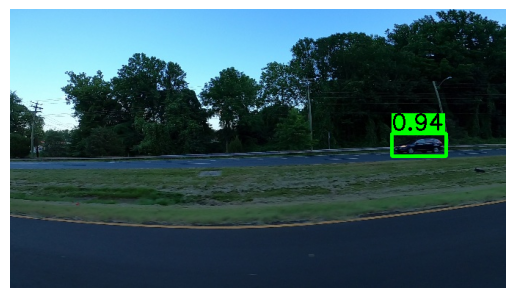

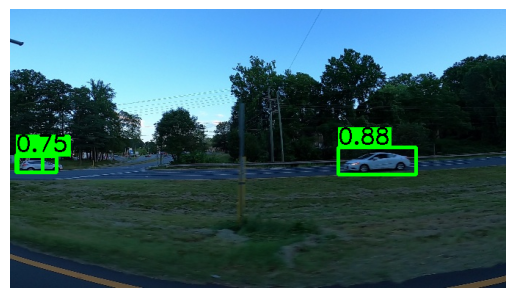

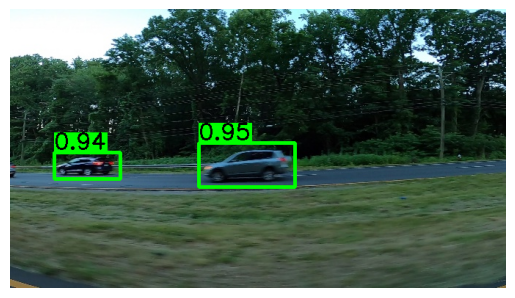

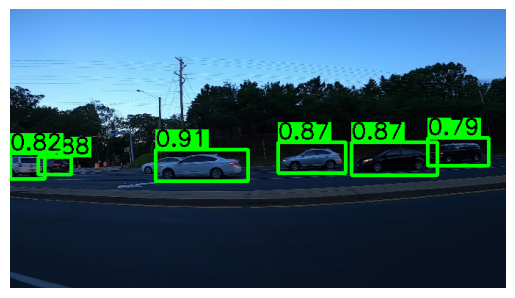

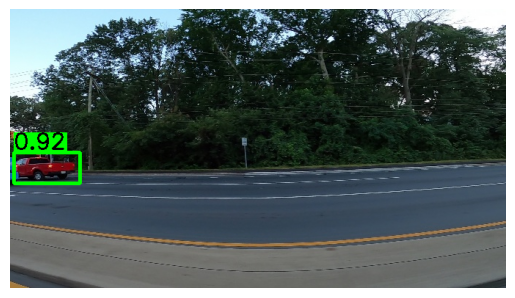

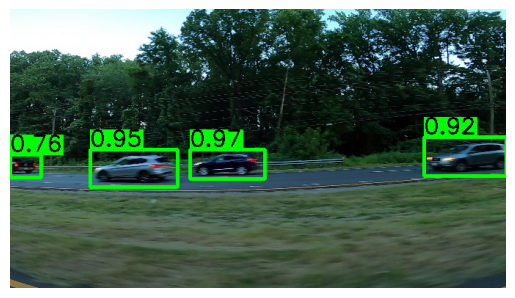

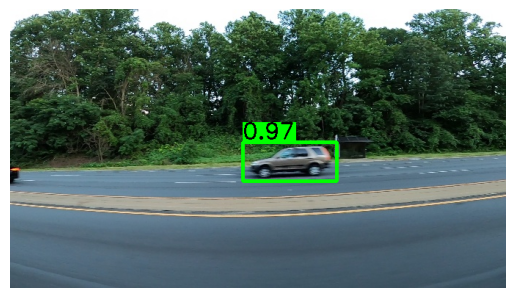

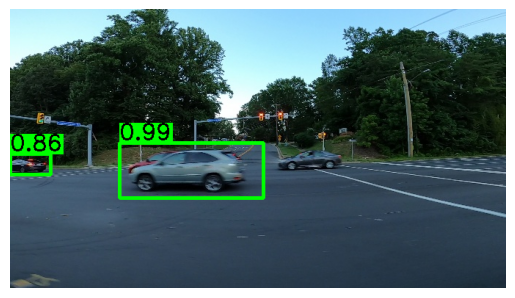

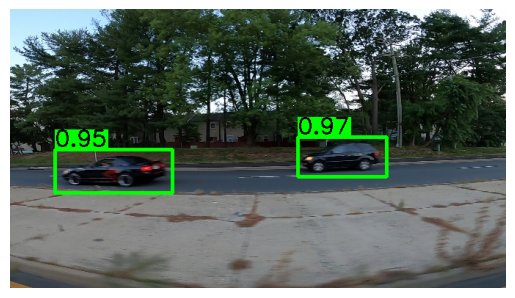

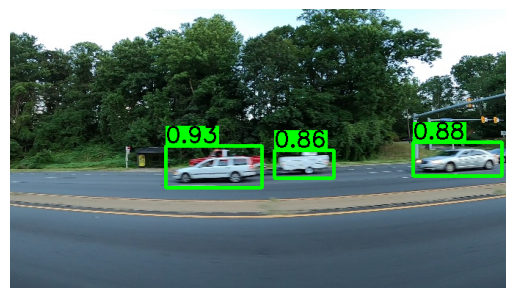

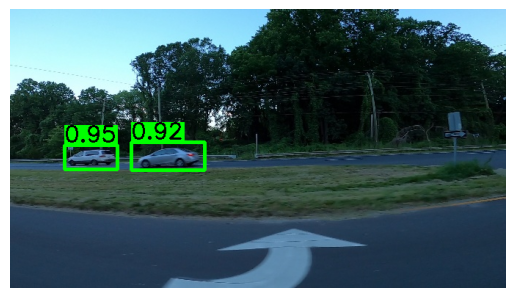

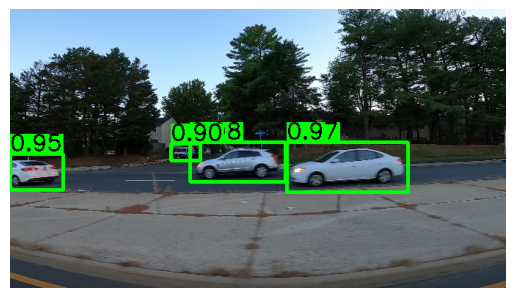

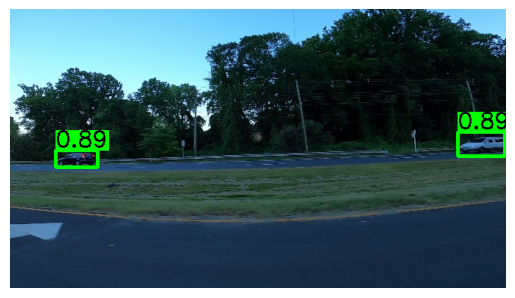

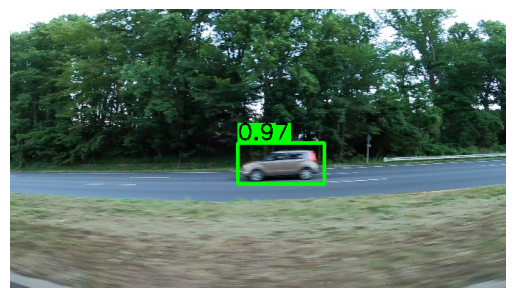

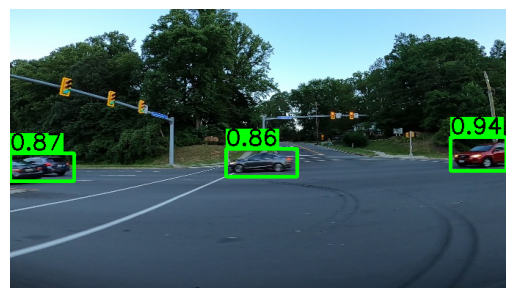

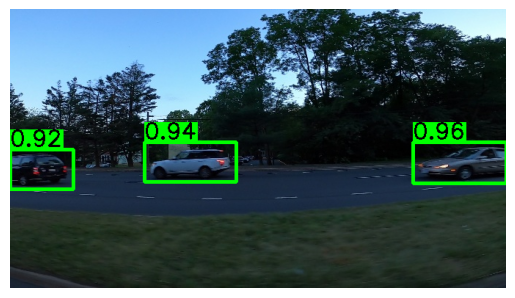

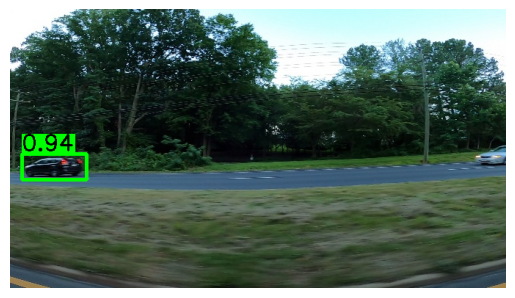

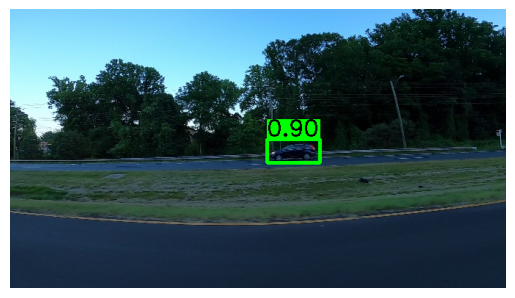

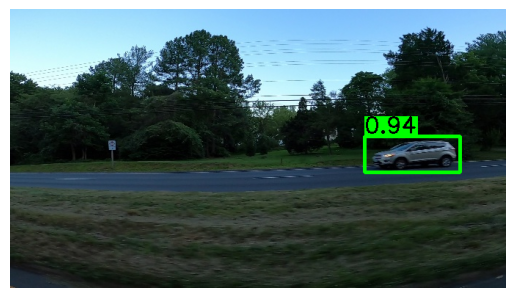

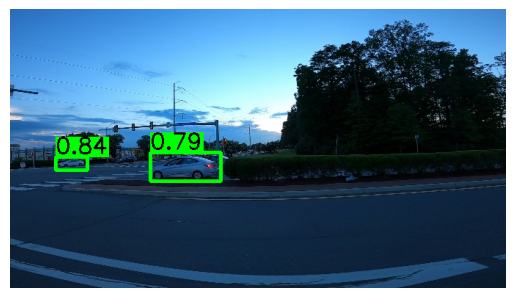

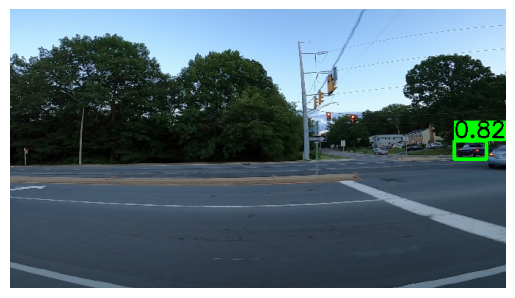

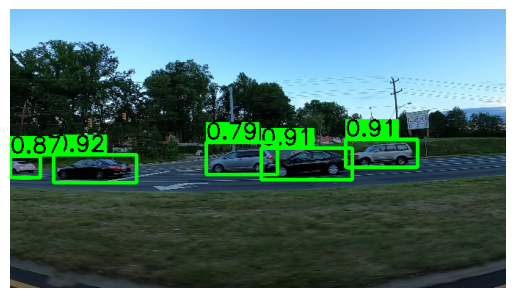

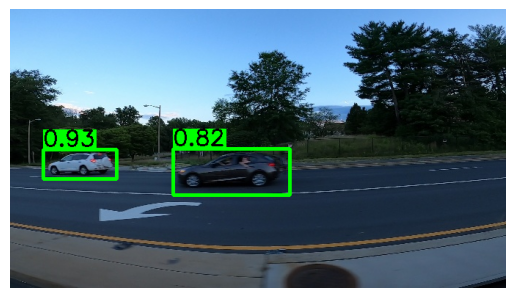

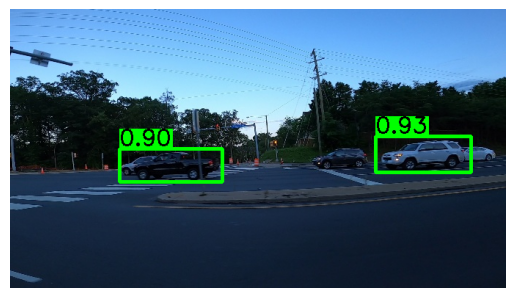

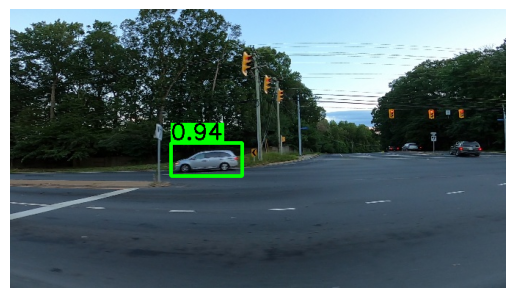

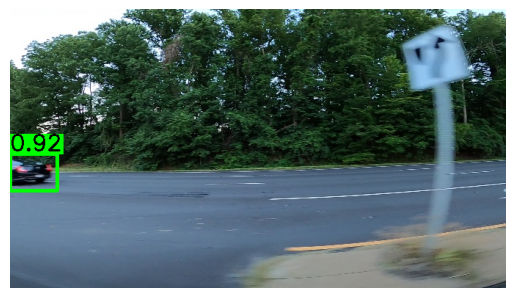

In [ ]:
from ultralytics import YOLO

model_path = 'models/yolov8/detect/train/weights/best.pt'
test_img_dir = '/content/yolo_data/val/images'
conf_thres=0.75
model = YOLO(model_path)
for img_name in os.listdir(test_img_dir):
    img_path = os.path.join(test_img_dir, img_name)

    # Run inference
    results = model(img_path, verbose=False)
    predictions = json.loads(results[0].tojson())
    visualized_img = visualize_bbox(img_path, predictions, conf_thres)

    %matplotlib inline
    plt.imshow(visualized_img)
    plt.axis('off')
    plt.show()